# Data and methodology of Machine Learning 

Mathurin Massias, mathurin.massias@inria.fr

Material taken from the Euroscipy 2019 scikit-learn tutorial by Loic Esteve and Olivier Grisel.

Today we will build our first Machine Learning pipeline, from dataloading to prediction through feature extraction and hyperparameter tuning.

In this notebook, we will look at necessary steps that happen before any machine learning takes place. 
* load the data
* look at the variables in the dataset, in particular make the difference
  between numerical and categorical variables, which need different
  preprocessing in most machine learning workflows
* visualize the distribution of the variables to gain some insights into the dataset.

In [1]:
import pandas as pd
import seaborn as sns

## Loading the adult census dataset

We will use data from the "Current Population adult_census" from 1994 that we
downloaded from [OpenML](http://openml.org/).

In [2]:
adult_census = pd.read_csv("https://www.openml.org/data/get_csv/1595261/adult-census.csv")

What does csv mean? Do you notice anything special about our use of the `pandas.read_csv` function?

We can look at the OpenML webpage to know more about this dataset: https://www.openml.org/d/1590

## Look at the variables in the dataset
The data are stored in a pandas dataframe.

In [3]:
adult_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


The column named **class** is our target variable (i.e., the variable which
we want to predict). The two possible classes are `<= 50K` (low-revenue) and
`> 50K` (high-revenue).

What type of data do we have? And which problem are we considering? Can you envision practical usecases of this dataset?

In [4]:
adult_census.shape

(48842, 15)

In [5]:
target_column = 'class'
adult_census[target_column].value_counts()

class
<=50K    37155
>50K     11687
Name: count, dtype: int64

Note: classes are slighly imbalanced. Class imbalance happens often in
practice and may need special techniques for machine learning. For example in
a medical setting, if we are trying to predict whether patients will develop
a rare disease, there will be a lot more sane patients than ill patients in
the dataset.

The dataset contains both numerical and categorical data. Numerical values
can take continuous values, for example `age`. Categorical values can have a
finite number of values, for exemple `native-country`.

In practice, `age` takes a finite number of values in the dataset. Yet, how is
it different from a categorical value?

In [6]:
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss',
                     'hours-per-week']
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation',
                       'relationship', 'race', 'sex', 'native-country']
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

In [7]:
adult_census

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,25,7,0,0,40,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,38,9,0,0,50,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,28,12,0,0,40,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,44,10,7688,0,40,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,18,10,0,0,30,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,38,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,40,9,0,0,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,58,9,0,0,40,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,22,9,0,0,20,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


Note that for simplicity, we have ignored the "fnlwgt" (final weight) column
that was crafted by the creators of the dataset when sampling the dataset to
be representative of the full census database.

## Inspect the data
Before building a machine learning model, it is a good idea to look at the
data:
* maybe the task you are trying to achieve can be solved without machine
  learning
* you need to check that the data you need for your task is indeed present in
the dataset
* inspecting the data is a good way to find peculiarities. These can can
  arise in the data collection (for example, malfunctioning sensor or missing
  values), or the way the data is processed afterwards (for example capped
  values).

Let's look at the distribution of individual variables, to get some insights
about the data. We can start by plotting histograms.

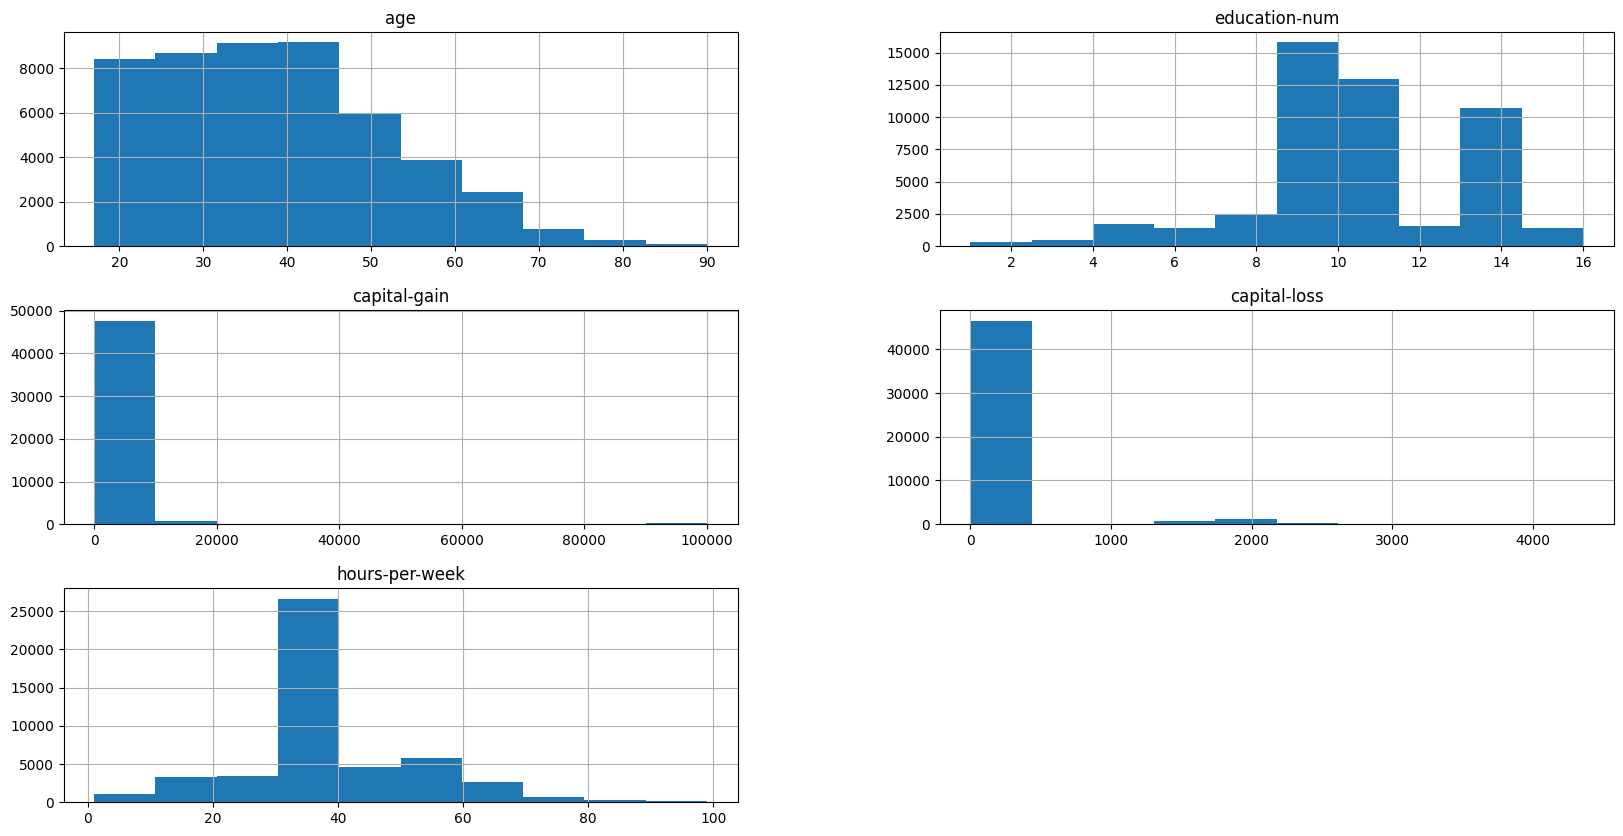

In [8]:
adult_census.hist(figsize=(20, 10));  # what did pandas do?

We can already make a few comments about some of the variables:
* age: there are not that many points for 'age > 70'. The dataset description
does indicate that retired people have been filtered out (`hours-per-week > 0`).
* education-num: peak at 10 and 13, hard to tell what it corresponds to
without looking much further. We'll do that later in this notebook.
* hours per week at 40, this was very likely the standard of working hours at
the time of the data collection
* most values of capital-gain and capital-loss are close to zero

For categorical variables, we can look at the distribution of values:

In [9]:
adult_census['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [10]:
adult_census['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

What's the issue with the approach we've adopted so far?

`ydata_profiling` is a nice tool to automate the data inspection (both for numerical and
categorical variables).

In [13]:
%pip install -U ydata_profiling


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import ydata_profiling
adult_census.profile_report()

/home/raynor/Lectures/X/Python4DataScience/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: Numba needs NumPy 2.1 or less. Got NumPy 2.3.

An alternative with powerful association tests is the `skrub` package (still quite recent)

In [ ]:
from skrub import TableReport
TableReport(adult_census)

As noted above, `education-num` distribution has two clear peaks around 10
and 13. It would be reasonable to expect that 'education-num' is the number of
years of education. Let's look at the relationship between education and
education-num.

In [ ]:
pd.crosstab(index=adult_census['education'], columns=adult_census['education-num'])

This shows that education and education-num are redundant. For
example, `education-num=2` is equivalent to `education='1st-4th'`. In
practice that means we can remove `education-num` without losing information.
Note that having redundant (or highly correlated) columns can be a problem
for machine learning algorithms.

Another way to inspect the data is to do a pairplot and show how variable
differ according to the class. In the diagonal you can see the distribution
of individual variables. The plots on the off-diagonal can reveal interesting
interactions between variables.

In the snippet below, what is the purpose of `n_samples_to_plot`? 
What's the advantage? What's the risk? How can we circumvent it?

In [ ]:
n_samples_to_plot = 5000
columns = ['age', 'education-num', 'hours-per-week']
sns.pairplot(data=adult_census[0:n_samples_to_plot], vars=columns,
             hue=target_column, plot_kws={'alpha': 0.2}, height=4,
             diag_kind='hist');


By looking at the data you could infer some hand-written rules to predict the
class:
* if you are young (less than 25 year-old roughly), you are in the `<= 50K` class.
* if you are old (more than 70 year-old roughly), you are in the `<= 50K` class.
* if you work part-time (less than 40 hours roughly) you are in the `<= 50K` class.

These hand-written rules could work reasonably well without the need for any
machine learning. Note however that it is not very easy to create rules for
the region `40 < hours-per-week < 60` and `30 < age < 70`. We can hope that
machine learning can help in this region. Also note that visualization can
help creating hand-written rules but is limited to 2 dimensions (maybe 3
dimensions), whereas machine learning models can build models in
high-dimensional spaces.

Another thing worth mentioning in this plot: if you are young (less than 25
year-old roughly) you tend to work less and if you are old (more than 70
year-old roughly). This is a non-linear relationship between age and hours
per week. **Some machine learning models can only capture linear interaction so
this may be a factor when deciding which model to chose.**

In a machine-learning setting, we will use an algorithm to automatically
decide what should be the "rules" in order to predict on new data. We can
check which set of simple rule a decision tree would grasp using the same
data.

In [ ]:
def plot_tree_decision_function(tree, X, y, ax):
    """Plot the different decision rules found by a `DecisionTreeClassifier`.

    Parameters
    ----------
    tree : DecisionTreeClassifier instance
        The decision tree to inspect.
    X : dataframe of shape (n_samples, n_features)
        The data used to train the `tree` estimator.
    y : ndarray of shape (n_samples,)
        The target used to train the `tree` estimator.
    ax : matplotlib axis
        The matplotlib axis where to plot the different decision rules.
    """
    import numpy as np
    from scipy import ndimage

    h = 0.02
    x_min, x_max = 0, 100
    y_min, y_max = 0, 100
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)
    )

    Z = tree.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    faces = tree.tree_.apply(
        np.c_[xx.ravel(), yy.ravel()].astype(np.float32)
    )
    faces = faces.reshape(xx.shape)
    border = ndimage.laplace(faces) != 0
    ax.scatter(
        X.iloc[:, 0], X.iloc[:, 1], c=np.array(['tab:blue', 'tab:red'])[y],
        s=60, alpha=0.7
    )
    ax.contourf(xx, yy, Z, alpha=.4, cmap='RdBu_r')
    ax.scatter(xx[border], yy[border], marker='.', s=1)
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    sns.despine(offset=10)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)  # reset the plotting style

In [ ]:
from sklearn.preprocessing import LabelEncoder

# select a subset of data
data_subset = adult_census[:n_samples_to_plot]
X = data_subset[["age", "hours-per-week"]]
y = LabelEncoder().fit_transform(data_subset[target_column].to_numpy())


In [ ]:
y 

In [ ]:
data_subset[target_column]

We will create a decision tree which we will keep really simple on purpose.
We will only allow a maximum of 2 rules to interpret the results.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

max_leaf_nodes = 3
tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=max_leaf_nodes, random_state=0)

tree.fit(X, y)

We can now first check the set of rules learnt by the tree and check
visually what theses rules look like.

In [ ]:
# plot the tree structure
fig, ax = plt.subplots()
plot_tree(tree, ax=ax)
plt.show()

In [ ]:
# plot the decision function learned by the tree
fig, ax = plt.subplots()
plot_tree_decision_function(tree, X, y, ax=ax)
plt.show()

Allowing only 3 leaves in the tree, we get similar rules than the one
designed by hand:
* the persons younger than 28.5 year-old will be considered in the class
  earning `<= 50K`.
* the persons older than 28.5 and working more than 40.5 hours-per-week
  will be considered in the class earning `> 50K`, while the one working
  below 40.5 hours-per-week, will be considered in the class
  earning `<= 50K`.


So far we have:
* loaded the data from a CSV file using `pandas`
* looked at the kind of variables in the dataset, and make the difference
  between categorical and numerical variables.
* inspected the data with `pandas`, `seaborn` and `ydata_profiling`. Data inspection
  can allow you to decide whether using machine learning is appropriate for
  your data and to notice potential peculiarities in your data.
  
**Let's move to more advanced model fitting**

In [ ]:
target_name = "class"
target = adult_census[target_name]
data = adult_census.drop(columns=[target_name])

In [ ]:
print(
    f"The dataset contains {data.shape[0]} samples and {data.shape[1]} "
    "features"
)

Let's check again the type of data we have: 

In [ ]:
data.dtypes

In [ ]:
import numpy as np
data_numeric = data.select_dtypes(include=np.number)

In [ ]:
data_numeric

We're going to train various models. How can we choose the best? 
- choice of metric (here OK: classification)
- applied to what?

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data_numeric, target, random_state=2407,
)

print(
    f"The training dataset contains {data_train.shape[0]} samples and "
    f"{data_train.shape[1]} features"
)
print(
    f"The testing dataset contains {data_test.shape[0]} samples and "
    f"{data_test.shape[1]} features"
)

We will build a linear classification model called "Logistic Regression". The
`fit` method is called to train the model from the input and target data. Only
the training data should be given for this purpose.

In addition, when checking the time required to train the model and internally
check the number of iterations done by the solver to find a solution.

In [ ]:
from sklearn.linear_model import LogisticRegression
import time

model = LogisticRegression(solver='lbfgs')
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

print(
    f"The model {model.__class__.__name__} was trained in "
    f"{elapsed_time:.3f} seconds for {model.n_iter_} iterations"
)

In [ ]:
target_predicted = model.predict(data_test)  # predict on test data

predictions = data_test.copy()
predictions['predicted-class'] = target_predicted
predictions['true-class'] = target_test
predictions['correct'] = target_predicted == target_test
predictions.head(n=10)

In [ ]:
print(
    f"The test accuracy using a {model.__class__.__name__} is "
    f"{model.score(data_test, target_test):.5f}"
)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(data_test), target_test)

In [ ]:
(' <=50K' == target_test).mean()

In [ ]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="most_frequent").fit(data_train, target_train)
# clf.fit(X, y) returns clf so we can chain the calls
dummy.score(data_test, target_test)

## Exercise 1

- What would be the score of a model that always predicts `' >50K'`?
- What would be the score of a model that always predicts `' <=50K'`?
- Is 81% or 82% accuracy a good score for this problem?

Hint: You can compute the cross-validated of a [DummyClassifier](https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators) the performance of such baselines.

In [ ]:
data_train.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_train)
data_train_scaled = scaler.transform(data_train)  # shorthand: fit_transform
data_train_scaled

Let's have a look at the transformed data:

In [ ]:
data_train_scaled = pd.DataFrame(data_train_scaled, columns=data_train.columns)
data_train_scaled.describe()

In [ ]:
scaler.mean_, scaler.scale_

In [ ]:
clf = LogisticRegression().fit(data_train_scaled, target_train)
# score?
# scaler = StandardScaler()
data_test_scaled = scaler.transform(data_test)
model.score(data_test_scaled, target_test)

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [ ]:
print(
    f"The accuracy using a {model.__class__.__name__} is "
    f"{model.score(data_test, target_test):.5f} with a fitting time of "
    f"{elapsed_time:.3f} seconds in {model[-1].n_iter_} iterations"
)

In [ ]:
model.predict(data_test)

Let's now perform 5 fold cross validation:

In [ ]:
for k in range(5):
    train, test = ..., ...

Don't do as above, coding the CV yourself! 

Always look for functions already coded (in reference packages): 
- they'll be more correct than our version
- they'll be faster than our version
- they'll have nicer functionalities that we didn't know we wanted
- we'll leverage the work of many smart people that asked themselves the same question as we are asking now

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, data_numeric, target, cv=4, n_jobs=-1)
print(f"The different scores obtained are: \n{scores}")

In [ ]:
print(f"The mean cross-validation accuracy is: "
      f"{scores.mean():.3f} +/- {scores.std():.3f}")

## Working with categorical variables

As we have seen in the previous section, a numerical variable is a continuous
quantity represented by a real or integer number. Those variables can be
naturally handled by machine learning algorithms that typically composed of
a sequence of arithmetic instructions such as additions and multiplications.

By opposition, categorical variables have discrete values typically represented
by string labels taken in a finite list of possible choices. For instance, the
variable `native-country` in our dataset is a categorical variable because it
encodes the data using a finite list of possible countries (along with the `?`
marker when this information is missing):

In [ ]:
data["native-country"].value_counts()

In the remainder of this section, we will present different strategies to
encode categorical data into numerical data which can be used by a
machine-learning algorithm.

In [ ]:
data_categorical = adult_census.select_dtypes(include=[object]).drop(columns=["class"])

In [ ]:
data_categorical.head()

In [ ]:
print(f"The datasets is composed of {data_categorical.shape[1]} features")

### Encoding ordinal categories

The most intuitive strategy is to encode each category with a number.
The `OrdinalEncoder` will transform the data in such manner.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(data_categorical)
# encoder.fit(data_categorical)
# data_encoded = encoder.transform(data_categorical)

print(f"The dataset encoded contains {data_encoded.shape[1]} features")
data_encoded[:5]

In [ ]:
encoder.categories_  # the udnerscore means it's available after fitting only

We can see that all categories have been encoded for each feature
independently. We can also notice that the number of features before and after
the encoding is the same.

However, one has to be careful when using this encoding strategy. Using this
integer representation can lead the downstream models to make the assumption
that the categories are ordered: 0 is smaller than 1 which is smaller than 2,
etc.

By default, `OrdinalEncoder` uses a lexicographical strategy to map string
category labels to integers. This strategy is completely arbitrary and often be
meaningless. For instance suppose the dataset has a categorical variable named
"size" with categories such as "S", "M", "L", "XL". We would like the integer
representation to respect the meaning of the sizes by mapping them to increasing
integers such as 0, 1, 2, 3. However lexicographical strategy used by default
would map the labels "S", "M", "L", "XL" to 2, 1, 0, 3.

The `OrdinalEncoder` class accepts a "categories" constructor argument to pass
an the correct ordering explicitly.

If a categorical variable does not carry any meaningful order information then
this encoding might be misleading to downstream statistical models and you might
consider using one-hot encoding instead (see below).

Note however that the impact a violation of this ordering assumption is really
dependent on the downstream models (for instance linear models are much more
sensitive than models built from a ensemble of decision trees).

### Encoding nominal categories (without assuming any order)

`OneHotEncoder` is an alternative encoder that can prevent the dowstream
models to make a false assumption about the ordering of categories. For a
given feature, it will create as many new columns as there are possible
categories. For a given sample, the value of the column corresponding to the
category will be set to `1` while all the columns of the other categories will
be set to `0`.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(data_categorical)
print(f"The dataset encoded contains {data_encoded.shape[1]} features")
data_encoded

In [ ]:
columns_encoded = encoder.get_feature_names_out(data_categorical.columns)
pd.DataFrame(data_encoded, columns=columns_encoded).head()

In [ ]:
model = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    LogisticRegression(solver='lbfgs', max_iter=1000),
)
scores = cross_val_score(model, data_categorical, target, cv=5)
print(f"The different scores obtained are: \n{scores}")

In [ ]:
print(f"The accuracy is: {scores.mean():.3f} +/- {scores.std():.5f}")

## Exercise 2:

- Try to fit a logistic regression model on categorical data transformed by
  the OrdinalEncoder instead. What do you observe?

In [ ]:
model = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    LogisticRegression(solver='lbfgs', max_iter=1000)
)
scores = cross_val_score(model, data_categorical, target, cv=5)
print(f"The different scores obtained are: \n{scores}")

### Using all the data at hand and specifying which columns to transform how

In [ ]:
binary_encoding_columns = ['sex']
one_hot_encoding_columns = ['workclass', 'education', 'marital-status',
                            'occupation', 'relationship',
                            'race', 'native-country']
scaling_columns = ['age', 'education-num', 'hours-per-week',
                   'capital-gain', 'capital-loss']

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('binary-encoder', OrdinalEncoder(), binary_encoding_columns),
    ('one-hot-encoder', OneHotEncoder(handle_unknown='ignore'), one_hot_encoding_columns),
    ('standard-scaler', StandardScaler(), scaling_columns)
])
model = make_pipeline(
    preprocessor,
    LogisticRegression(solver='lbfgs', max_iter=1000)
)

Pipelines, as all sklearn models, can be displayed!

In [ ]:
model

In [ ]:
scores = cross_val_score(model, data, target, cv=5)
print(f"The different scores obtained are: \n{scores}")

In [ ]:
print(f"The accuracy is: {scores.mean():.3f} +- {scores.std():.3f}")

The compound model has a higher predictive accuracy than the
two models that used numerical and categorical variables in
isolation.

## The issue of finding the best model parameters

In the previous example, we created a `LogisticRegression` classifier using
the default parameters by omitting setting explicitly these parameters.

For this classifier, the parameter `C` governes the penalty; in other
words, how much our model should "trust" (or fit) the training data.

Therefore, the default value of `C` is never certified to give the best
performing model.

We can make a quick experiment by changing the value of `C` and see the
impact of this parameter on the model performance.

In [ ]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

In [ ]:
for max_depth in [3, 7]:
    model = make_pipeline(
        preprocessor, DecisionTreeClassifier(max_depth=max_depth)
    )
    model.fit(data_train, target_train)
    print(
        f"The accuracy score using a {model.__class__.__name__} is "
        f"{model.score(data_test, target_test):.3f} with max_depth={max_depth}"
    )


## Finding the best model hyper-parameters via exhaustive parameters search

We see that the parameter `max_depth` as a significative impact on the model
performance. This parameter should be tuned to get the best cross-validation
score, so as to avoid over-fitting problems.

In short, we will set the parameter, train our model on some data, and
evaluate the model performance on some left out data. Ideally, we will select
the parameter leading to the optimal performance on the testing set.
Scikit-learn provides a `GridSearchCV` estimator which will handle the
cross-validation and hyper-parameter search for us.

In [ ]:
from sklearn.model_selection import GridSearchCV

model = make_pipeline(
    preprocessor, DecisionTreeClassifier()
)

We will see that we need to provide the name of the parameter to be set.
Thus, we can use the method `get_params()` to have the list of the parameters
of the model which can set during the grid-search.

In [ ]:
model

In [ ]:
print("The hyper-parameters are for a Decision Tree model are:")
for param_name in DecisionTreeClassifier().get_params().keys():
    print(param_name)

print("\nThe hyper-parameters are for the full-pipeline are:")
for param_name in model.get_params().keys():
    print(param_name)

The parameter `'decisiontreeclassifier__max_depth'` is the parameter for which we would
like different values. Let see how to use the `GridSearchCV` estimator for
doing such search.

In [ ]:
import time
import numpy as np

param_grid = {'decisiontreeclassifier__max_depth': (3, 7, 10),
              'decisiontreeclassifier__criterion': ('gini', 'entropy')}
model_grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs=4, cv=5)
start = time.time()
model_grid_search.fit(data_train, target_train)
elapsed_time = time.time() - start
print(
    f"The accuracy score using a {model_grid_search.__class__.__name__} is "
    f"{model_grid_search.score(data_test, target_test):.2f} in "
    f"{elapsed_time:.3f} seconds"
)

The `GridSearchCV` estimator takes a `param_grid` parameter which defines
all possible parameters combination. Once the grid-search fitted, it can be
used as any other predictor by calling `predict` and `predict_proba`.
Internally, it will use the model with the best parameters found during
`fit`. You can know about these parameters by looking at the `best_params_`
attribute.

In [ ]:
print(f"The best set of parameters is: {model_grid_search.best_params_}")

In [ ]:
pd.DataFrame(model_grid_search.cv_results_)

With the `GridSearchCV` estimator, the parameters need to be specified
explicitely. Instead, one could randomly generate (following a specific
distribution) the parameter candidates. The `RandomSearchCV` allows for such
stochastic search. It is used similarly to the `GridSearchCV` but the
sampling distributions need to be specified instead of the parameter values.

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'decisiontreeclassifier__max_depth': randint(low=1, high=30)}
model_grid_search = RandomizedSearchCV(
    model, param_distributions=param_distributions, n_iter=5, n_jobs=4, cv=5
)
model_grid_search.fit(data_train, target_train)
print(
    f"The accuracy score using a {model_grid_search.__class__.__name__} is "
    f"{model_grid_search.score(data_test, target_test):.2f}"
)
print(f"The best set of parameters is: {model_grid_search.best_params_}")


In [ ]:
model_grid_search.cv_results_

## Notes on search efficiency: dedicated `*CV` estimators

Be aware that sometimes, scikit-learn provides some `EstimatorCV` classes
which will perform internally the cross-validation in such way that it will
more computationally efficient. We can give the example of the
`LogisticRegressionCV` which can be used to find the best `C` in a more
efficient way than what we previously did with the `GridSearchCV`.

Caveat: it is usable only when the model is a simple `LogisticRegression`!

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# define the different Cs to try out
param_grid = {"C": (0.1, 1.0, 10.0)}

model = make_pipeline(
    preprocessor,
    LogisticRegressionCV(Cs=param_grid['C'], max_iter=1000, solver='lbfgs',
                         n_jobs=4, cv=5)
)
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start
print(f"Time elapsed to train LogisticRegressionCV: "
      f"{elapsed_time:.3f} seconds")

The `fit` time for the `CV` version of `LogisticRegression` give a speed-up
x2. This speed-up is provided by re-using the values of coefficients to
warm-start the estimator for the different `C` values.


## Exercises:

- Build a machine learning pipeline:
    - preprocess the categorical columns using an `OrdinalEncoder` and let
        the numerical columns as they are.
    - use an `HistGradientBoostingClassifier` as a predictive model.
- Make an hyper-parameters search using `RandomizedSearchCV` and tuning the
  parameters:
    * `learning_rate` with values ranging from 0.001 to 0.5. You can use
        an exponential distribution to sample the possible values.
    * `l2_regularization` with values ranging from 0 to 0.5. You can use
        a uniform distribution.
    * `max_lead_nodes` with values ranging from 5 to 30. The values should
        be integer following a uniform distribution.
    * `min_samples_leaf` with values ranging from 5 to 30. The values
        should be integer following a uniform distribution.

In case you have issues of with unknown categories, try to precompute the
list of possible categories ahead of time and pass it explicitly to the
constructor of the encoder:

```python
categories = [data[column].unique()
              for column in data[categorical_columns]]
OrdinalEncoder(categories=categories)
```

## Combining evaluation and hyper-parameters search

Cross-validation was used for searching the best model parameters. We
previously evaluate model performance through cross-validation as well. If we
would like to combine both aspects, we need to perform a "nested"
cross-validation. The "outer" cross-validation is applied to assess the
model while the "inner" cross-validation set the hyper-parameters of the
model on the data set provided by the "outer" cross-validation. In practice,
it is equivalent of including, `GridSearchCV`, `RandomSearchCV`, or any
`EstimatorCV` in a `cross_val_score` or `cross_validate` function call.

In [ ]:
from sklearn.model_selection import cross_val_score

model = make_pipeline(
    preprocessor, LogisticRegressionCV(max_iter=1000, solver='lbfgs', cv=5)
)
score = cross_val_score(model, data, target, n_jobs=4, cv=5)
print(f"The accuracy score is: {score.mean():.2f} +- {score.std():.3f}")
print(f"The different scores obtained are: \n{score}")

Be aware that such training might involve a variation of the hyper-parameters
of the model. When analyzing such model, you should not only look at the
overall model performance but look at the hyper-parameters variations as
well.